In [ ]:
!mkdir -pv ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: created directory '/root/.kaggle'
cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:04<00:00, 263MB/s]
100% 1.06G/1.06G [00:04<00:00, 251MB/s]


In [ ]:
import zipfile
zip_ref= zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# import necessary libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
# generator
# training data
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels="inferred",
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)


# validation data
# generator
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels="inferred",
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(image, label):
  image= tf.cast(image/255. , tf.float32)
  return image,label

  train_ds= train_ds.map(process)
  validation_ds= validation_ds.map(process)

In [ ]:
# create cnn model
model= Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history= model.fit(train_ds, epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 58s 81ms/step - loss: 1.3079 - accuracy: 0.5767 - val_loss: 0.6728 - val_accuracy: 0.5844
Epoch 2/10
625/625 [==============================] - 51s 82ms/step - loss: 0.6388 - accuracy: 0.6443 - val_loss: 0.6721 - val_accuracy: 0.5878
Epoch 3/10
625/625 [==============================] - 73s 117ms/step - loss: 0.6232 - accuracy: 0.6605 - val_loss: 0.6827 - val_accuracy: 0.5950
Epoch 4/10
625/625 [==============================] - 63s 101ms/step - loss: 0.5031 - accuracy: 0.7423 - val_loss: 0.7716 - val_accuracy: 0.6210
Epoch 5/10
625/625 [==============================] - 58s 92ms/step - loss: 0.4065 - accuracy: 0.8110 - val_loss: 1.1151 - val_accuracy: 0.6096
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2921 - accuracy: 0.8735 - val_loss: 1.3726 - val_accuracy: 0.6260
Epoch 7/10
625/625 [==============================] - 64s 101ms/step - loss: 0.2842 - accuracy: 0.8931 - val_loss: 1.5786 - val_accur

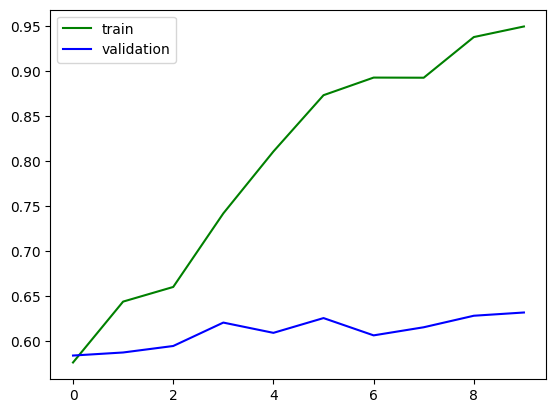

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='green',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

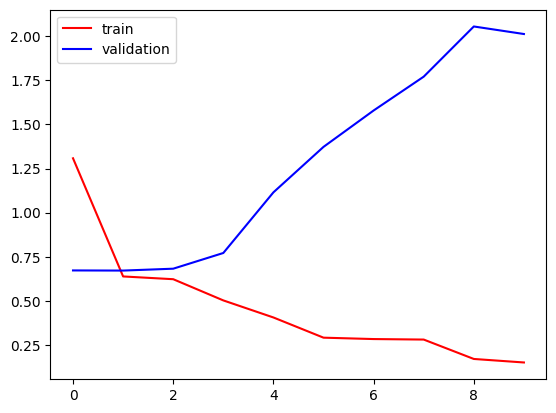

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img1=cv2.imread('/content/cat.jpg')
test_img2=cv2.imread('/content/dog.jpg')

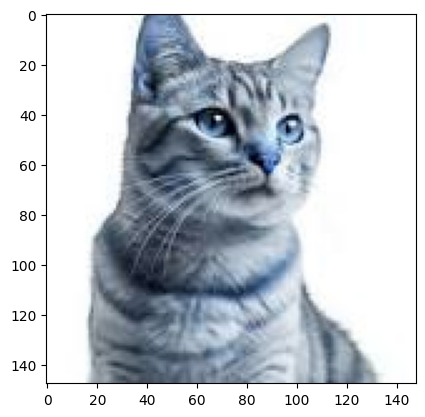

In [ ]:
plt.imshow(test_img1)

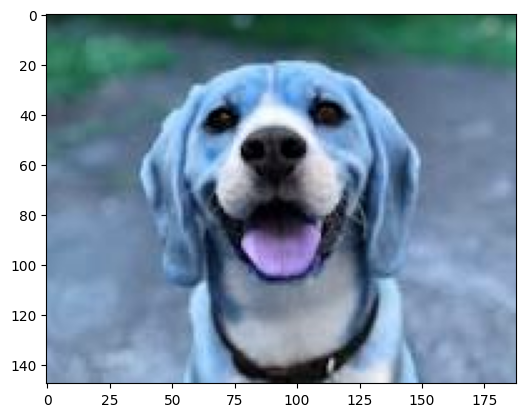

In [ ]:
plt.imshow(test_img2)

In [ ]:
test_img1.shape

(148, 148, 3)

In [ ]:
test_img2.shape

(148, 188, 3)

In [ ]:
# resizes images
test_img1=cv2.resize(test_img1,(256,256))
test_img2=cv2.resize(test_img2,(256,256))

In [ ]:
#reshape
test_input1=test_img1.reshape((1,256,256,3))
test_input2=test_img2.reshape((1,256,256,3))

In [ ]:
model.predict(test_input1)

1/1 [==============================] - 0s 489ms/step


array([[0.275518]], dtype=float32)

In [ ]:
model.predict(test_input2)

1/1 [==============================] - 0s 43ms/step


array([[0.9999988]], dtype=float32)